In [91]:
# get number of unassigned vs how many of the unassigned are only there once
import pandas as pd
df = pd.read_csv('../data/251028_agg_by_domain.csv')
df_pivot = df.pivot(index='ident', columns='domain', values='n_unique_weighted_found').reset_index()
df_pivot['total_weighted_hashes'] = df.groupby('ident')['total_weighted_hashes'].first().values
cols = ['ident', 'Eukaryota', 'd__Archaea', 'd__Bacteria', 'plasmids', 'total_weighted_hashes', 'vOTUs']
df_pivot = df_pivot[cols]
df_pivot['unknown_hashes'] = df_pivot['total_weighted_hashes']-df_pivot.drop(columns=['ident', 'total_weighted_hashes']).sum(axis=1)
df =df_pivot
df['Archaea+Bacteria'] = df['d__Archaea'] + df['d__Bacteria']


In [92]:
cols_to_divide = ['Archaea+Bacteria', 'vOTUs', 'plasmids', 'Eukaryota', 'unknown_hashes']

# Create a new df with percentages
df_percent = df[cols_to_divide].div(df['total_weighted_hashes'], axis=0) * 100
df_percent.to_csv('test.csv')

In [85]:
df_percent['unknown_hashes'].mean()


20.499087782375497

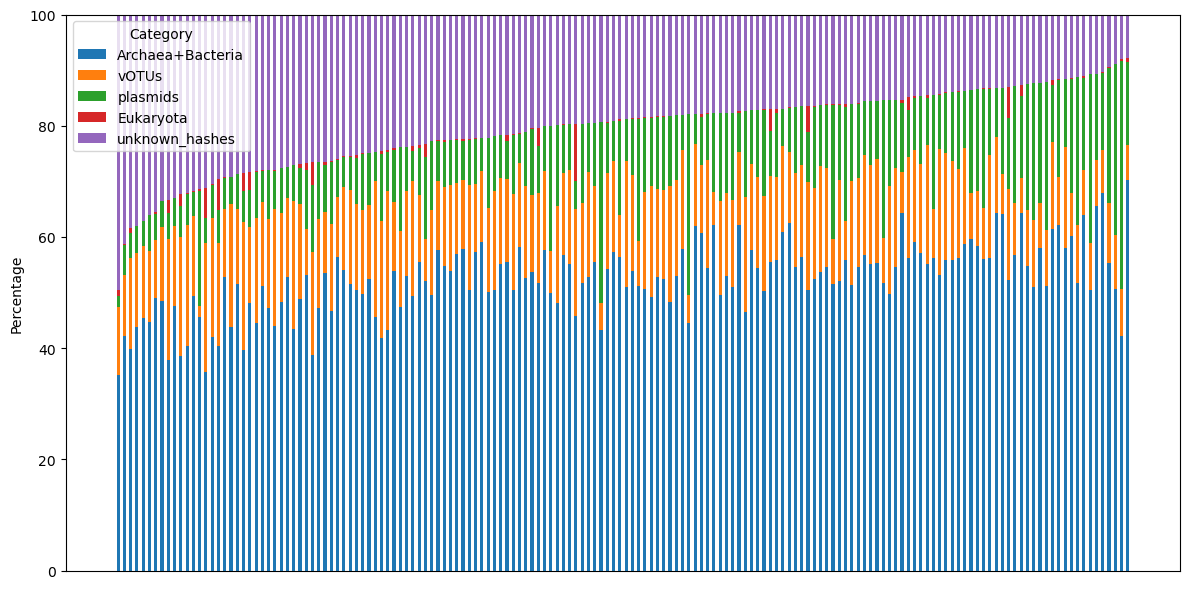

In [51]:
import numpy as np
import matplotlib.pyplot as plt

cols_to_divide = ['Archaea+Bacteria', 'vOTUs', 'plasmids', 'Eukaryota', 'unknown_hashes']
df_percent = df[cols_to_divide].div(df['total_weighted_hashes'], axis=0) * 100
df_percent['ident'] = df['ident']

# Sort by unknown_hashes
df_percent = df_percent.sort_values('unknown_hashes', ascending=False).reset_index(drop=True)

categories = ['Archaea+Bacteria', 'vOTUs', 'plasmids', 'Eukaryota', 'unknown_hashes']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, ax = plt.subplots(figsize=(12,6))
bottom = np.zeros(len(df_percent))

for cat, color in zip(categories, colors):
    ax.bar(df_percent.index, df_percent[cat], bottom=bottom, color=color, width=0.5, label=cat)
    bottom += df_percent[cat]

ax.set_xticks([])  # remove x-axis ticks
ax.set_xticklabels([])  # remove x-axis labels
ax.set_ylabel("Percentage")
ax.set_ylim(0, 100)
ax.legend(title="Category")  # now it works
plt.tight_layout()
plt.show()
#plt.savefig('../plots/251028_stackbar.domains.allhashes.pdf')

## Make same plot but reduce unknown hashes only to hashes that are either found >1 , >=5 or >+0
unknown hash averages now:
all: 20.4%
m2 : 10.7%
m5: 4.7%
m10: 2.7%

In [93]:
# now do it again but subtract the hashes only once in a sig
# so m10 has -m 10, so hashes with abundance greater than 10. (sum_hashes)
df_filtered_hash = pd.read_csv('../data/sum_hashes_filter.csv')
df =  df.merge(df_filtered_hash, on='ident')

In [94]:
# we need new value for unknown hahses, which is the value in mX
df['unknown_hashes'] = df['m10']

# then the total needs to reflect the new total
df['total_weighted_hashes'] = df[['Eukaryota', 'Archaea+Bacteria', 'plasmids', 'vOTUs', 'unknown_hashes']].sum(axis=1)


In [95]:
cols_to_divide = ['Archaea+Bacteria', 'vOTUs', 'plasmids', 'Eukaryota', 'unknown_hashes']

# Create a new df with percentages
df_percent = df[cols_to_divide].div(df['total_weighted_hashes'], axis=0) * 100


In [96]:
df_percent['unknown_hashes'].mean()


2.755222123742862

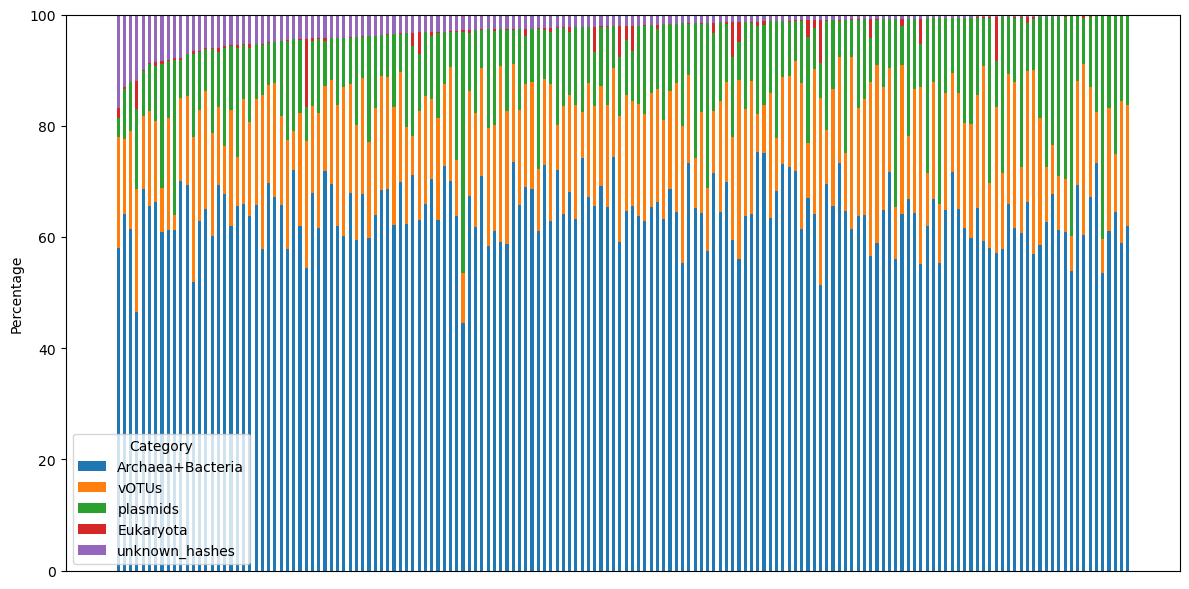

<Figure size 640x480 with 0 Axes>

In [97]:
import numpy as np
import matplotlib.pyplot as plt

cols_to_divide = ['Archaea+Bacteria', 'vOTUs', 'plasmids', 'Eukaryota', 'unknown_hashes']
df_percent = df[cols_to_divide].div(df['total_weighted_hashes'], axis=0) * 100
df_percent['ident'] = df['ident']

# Sort by unknown_hashes
df_percent = df_percent.sort_values('unknown_hashes', ascending=False).reset_index(drop=True)

categories = ['Archaea+Bacteria', 'vOTUs', 'plasmids', 'Eukaryota', 'unknown_hashes']
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

fig, ax = plt.subplots(figsize=(12,6))
bottom = np.zeros(len(df_percent))

for cat, color in zip(categories, colors):
    ax.bar(df_percent.index, df_percent[cat], bottom=bottom, color=color, width=0.5, label=cat)
    bottom += df_percent[cat]

ax.set_xticks([])  # remove x-axis ticks
ax.set_xticklabels([])  # remove x-axis labels
ax.set_ylabel("Percentage")
ax.set_ylim(0, 100)
ax.legend(title="Category")  # now it works
plt.tight_layout()
plt.show()
plt.savefig('../plots/251028_stackbar.domains.m10hashes.pdf')

In [7]:
# import pandas as pd
# import re
# records = []

# with open('./unassigned_content_thresh.txt') as f:
#     content = f.read()


# blocks = content.split('---')

# for block in blocks:
#     if not block.strip():
#         continue

#     # get signature filename
#     m = re.search(r'signature filename: .*\/([^\/]+)\.m(\d+)\.zip', block)
#     if not m:
#         continue
#     ident = m.group(1)
#     m_type = f"m{m.group(2)}"

#     # get sum hashes
#     m_hash = re.search(r'sum hashes: (\d+)', block)
#     if not m_hash:
#         continue
#     sum_hashes = int(m_hash.group(1))

#     records.append((ident, m_type, sum_hashes))

# # create DataFrame
# df = pd.DataFrame(records, columns=['ident', 'm_type', 'sum_hashes'])

# # pivot so each m_type becomes a column
# df_wide = df.pivot(index='ident', columns='m_type', values='sum_hashes').reset_index()

# # optional: fill missing mX with 0
# df_wide = df_wide.fillna(0).astype({'m10': int, 'm2': int, 'm5': int})

# df_wide.to_csv('./sum_hashes_filter.csv')